In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
import numpy as np

In [2]:
# https://data.world/cdc/2015-drug-overdose-deaths
df1 = pd.read_csv('2015-death-data.csv', index_col=0)

In [3]:
df1.head()

,Range,Rate,Number,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
State,,,,,,,
AL,13.6 to 16.0,15.7,736,NaN,NaN,NaN,NaN
AK,13.6 to 16.0,16.0,122,NaN,NaN,NaN,NaN
AZ,18.6 to 21.0,19.0,"1,274",NaN,NaN,NaN,NaN
AR,13.6 to 16.0,13.8,392,NaN,NaN,NaN,NaN
CA,11.1 to 13.5,11.3,"4,659",NaN,NaN,NaN,NaN


In [4]:
df1.tail()

# Rate variable is how many deaths per 100,000 people. 

,Range,Rate,Number,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
State,,,,,,,
WA,13.6 to 16.0,14.7,"1,094",NaN,NaN,NaN,NaN
WV,21.0 to 41.5,41.5,725,NaN,NaN,NaN,NaN
WI,13.6 to 16.0,15.5,878,NaN,NaN,NaN,NaN
WY,16.1 to 18.5,16.4,96,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get rid of the empty columns and commas

columns = ['Range', 'Rate', 'Number']
df1 = pd.DataFrame(df1, columns=columns)

In [6]:
df1 = df1.replace(',','', regex=True)
c = df1.select_dtypes(object).columns
df1[c] = df1[c].apply(pd.to_numeric,errors='ignore')

In [7]:
df1.head()

,Range,Rate,Number
State,,,
AL,13.6 to 16.0,15.7,736.0
AK,13.6 to 16.0,16.0,122.0
AZ,18.6 to 21.0,19.0,1274.0
AR,13.6 to 16.0,13.8,392.0
CA,11.1 to 13.5,11.3,4659.0


In [8]:
df1.tail()

,Range,Rate,Number
State,,,
WA,13.6 to 16.0,14.7,1094.0
WV,21.0 to 41.5,41.5,725.0
WI,13.6 to 16.0,15.5,878.0
WY,16.1 to 18.5,16.4,96.0
NaN,NaN,NaN,NaN


In [9]:
df1.shape

(52, 3)

In [10]:
df1 = df1.iloc[:-1 , :]

In [11]:
df1.tail()

,Range,Rate,Number
State,,,
VA,11.1 to 13.5,12.4,1039.0
WA,13.6 to 16.0,14.7,1094.0
WV,21.0 to 41.5,41.5,725.0
WI,13.6 to 16.0,15.5,878.0
WY,16.1 to 18.5,16.4,96.0


In [12]:
# https://data.world/associatedpress/opioid-prescriptions-2010-2015
# MME is Morphine Milligram Equivalents
# fips = federal identification code for each county
df2 = pd.read_csv('Opioid_prescription_amounts.csv')

In [13]:
df2.head()

,FIPS,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
0,2050,AK,BETHEL,NaN,NaN,NaN,NaN
1,2068,AK,DENALI,NaN,NaN,NaN,NaN
2,2013,AK,ALEUTIANS EAST,NaN,NaN,NaN,NaN
3,2016,AK,ALEUTIANS WEST,NaN,NaN,NaN,NaN
4,2240,AK,SOUTHEAST FAIRBANKS,NaN,NaN,NaN,NaN


In [14]:
# get rid of NAs
df_2 = df2.dropna()

In [15]:
df_2.sample(25)

,FIPS,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
3087,54001,WV,BARBOUR,978.9,893.0,3.0,Stable
258,8101,CO,PUEBLO,1750.2,1167.0,4.0,Decreased
326,12017,FL,CITRUS,1536.5,1121.7,4.0,Decreased
2676,48227,TX,HOWARD,537.1,384.9,1.0,Decreased
3042,55091,WI,PEPIN,519.1,412.2,1.0,Decreased
2493,47151,TN,SCOTT,1026.7,1020.2,4.0,Stable
911,20099,KS,LABETTE,746.2,976.8,4.0,Increased
881,18121,IN,PARKE,513.7,351.2,1.0,Decreased
1707,37051,NC,CUMBERLAND,850.3,828.0,3.0,Stable
1915,34001,NJ,ATLANTIC,896.2,971.2,4.0,Stable


In [16]:
list(df_2)

['FIPS',
 'State',
 'County',
 'MME_PerCap_2010',
 'MME_PerCap_2015',
 'Quartile_2015',
 '2010-2015_Change']

In [17]:
df_2 = df_2[['State', 'MME_PerCap_2010','MME_PerCap_2015']]

In [18]:
df_2.shape

(2734, 3)

In [19]:
df2 = df_2.groupby(['State'])['MME_PerCap_2010', 'MME_PerCap_2015'].apply(np.mean)

<ipython-input-19-5042b72ed917>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df_2.groupby(['State'])['MME_PerCap_2010', 'MME_PerCap_2015'].apply(np.mean)


In [20]:
df2.head()

,MME_PerCap_2010,MME_PerCap_2015
State,,
AK,740.000000,609.770000
AL,935.525758,958.045455
AR,917.344776,883.905970
AZ,1064.942857,963.821429
CA,1063.996429,845.425000


In [21]:
df3 = pd.read_csv('opioid-prescriptions-dispensed-us-1991-2013.csv')

In [22]:
df3.head()

,Year,Prescriptions Dispensed (millions)
0,1991,76
1,1992,79
2,1993,82
3,1994,85
4,1995,87


In [23]:
list(df3)

['Year', 'Prescriptions Dispensed (millions)']

In [24]:
df3.shape

(23, 2)

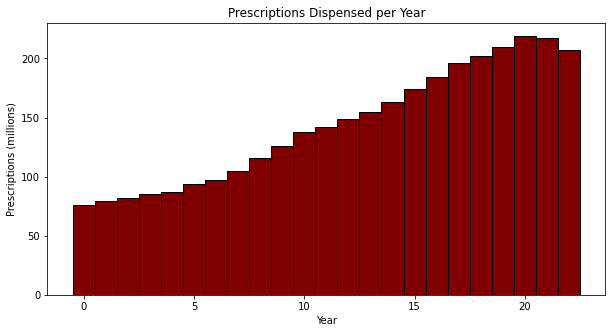

In [25]:
data = df3

prescriptions = df3["Prescriptions Dispensed (millions)"]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df3['Year'].index, prescriptions, color ='maroon',
        width = 1, edgecolor = "black")
 
plt.xlabel("Year")
plt.ylabel("Prescriptions (millions)")
plt.title("Prescriptions Dispensed per Year")
plt.show()

In [26]:
df4 = pd.read_excel('EducationReport.xlsx', index_col= 0)

In [27]:
df4.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Total,NaN,NaN,NaN,NaN,Urban,NaN,NaN,NaN,NaN,NaN,Rural,NaN,NaN,NaN,NaN,NaN
Name,1970,1980.000000,1990.000000,2000.000000,2015-2019,1970,1980.000000,1990.000000,2000.000000,2015-2019,NaN,1970,NaN,1980.000000,1990.000000,2000.000000,2015-2019
United States,0.106618,0.162296,0.203380,0.244016,0.321455,0.11542,0.174884,0.219667,0.262235,0.341864,NaN,0.0672646,NaN,0.104972,0.122836,0.149003,0.199979
Alabama,0.0784698,0.121797,0.156808,0.190347,0.254683,0.0888388,0.137495,0.178450,0.217080,0.285907,NaN,0.0529989,NaN,0.082044,0.097791,0.115997,0.154118


In [28]:
df4.tail()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
Wisconsin,0.0975806,0.148251,0.177418,0.224195,0.301167,0.10887,0.163976,0.197622,0.250460,0.331882,NaN,0.0672853,NaN,0.107948,0.124164,0.156313,0.216671
Wyoming,0.117809,0.171535,0.187908,0.219101,0.273625,0.131783,0.187194,0.205376,0.219192,0.259459,NaN,0.111255,NaN,0.164637,0.180311,0.219061,0.279983
Puerto Rico,NaN,NaN,NaN,0.182777,0.258693,NaN,NaN,NaN,0.185213,0.26162,NaN,NaN,NaN,NaN,NaN,0.122238,0.193843
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"For 1970 and 1980, the share of adults who are college graduates includes those who completed at four or more years of college regardless of degree earned. In 1990, 2000, and 2015-2019 the share includes those who received a bachelor's or higher degree.\n\nUrban and rural (metro and nonmetro) definitions are based on the Office of Management and Budget (OMB) February 2013. See the What is Rural?\n\nThe data for 2015-2019 is a 5-year average from the Census Bureau's American Community Survey. \n\nSources: U.S. Census Bureau, 1970, 1980, 1990, 2000 Censuses of Population, and the 2015-2019 American Community Survey.\n\n",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# https://data.world/rubyn/ses-demographics-arrests-analysis/workspace/data-dictionary
# 2017 data doesn't quite line up with the 2015 opiod data but it will work for the sake of exploratory analysis
# hypothesis: the rising rate of opiod prescriptions, education level, and state play a factor in opiod related death.

df5 = pd.read_excel('State - Income, Education Level by State.xlsx', index_col= 0)

In [30]:
df5.head()

,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_25km_of_state_counties,total_colleges_within_50km_of_state_counties,total_colleges_within_75km_of_state_counties,total_colleges_within_100km_of_state_counties
state,,,,,,,,
Alabama,Southeast,40271.402985,0.266510,0.2642,126,449,1042,1839
Alaska,West,66425.448276,0.820631,0.1705,0,0,0,0
Arizona,Southwest,45816.666667,0.423407,0.2270,11,47,107,202
Arkansas,Southeast,39025.080000,0.212615,0.1577,137,495,1121,1955
California,West,61046.758621,0.700403,0.1849,399,1379,2705,4292


In [31]:
df5.shape

(51, 8)

In [32]:
df1.head()

,Range,Rate,Number
State,,,
AL,13.6 to 16.0,15.7,736.0
AK,13.6 to 16.0,16.0,122.0
AZ,18.6 to 21.0,19.0,1274.0
AR,13.6 to 16.0,13.8,392.0
CA,11.1 to 13.5,11.3,4659.0


In [33]:
df1.shape

(51, 3)

In [34]:
df6 =pd.merge(df1, df5, on = df5.index)

In [35]:
df6.head()

,key_0,Range,Rate,Number,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_25km_of_state_counties,total_colleges_within_50km_of_state_counties,total_colleges_within_75km_of_state_counties,total_colleges_within_100km_of_state_counties
0,Alabama,13.6 to 16.0,15.7,736.0,Southeast,40271.402985,0.266510,0.2642,126,449,1042,1839
1,Alaska,13.6 to 16.0,16.0,122.0,West,66425.448276,0.820631,0.1705,0,0,0,0
2,Arizona,18.6 to 21.0,19.0,1274.0,Southwest,45816.666667,0.423407,0.2270,11,47,107,202
3,Arkansas,13.6 to 16.0,13.8,392.0,Southeast,39025.080000,0.212615,0.1577,137,495,1121,1955
4,California,11.1 to 13.5,11.3,4659.0,West,61046.758621,0.700403,0.1849,399,1379,2705,4292


In [36]:
list(df6)

['key_0',
 'Range',
 'Rate',
 'Number',
 'region',
 'state_median_income',
 'state_income_percentile',
 'state_proportion_with_bachelors_or_higher',
 'total_colleges_within_25km_of_state_counties',
 'total_colleges_within_50km_of_state_counties',
 'total_colleges_within_75km_of_state_counties',
 'total_colleges_within_100km_of_state_counties']

In [37]:
# drop 25, 50, 75 column
df6 = df6.drop(['Range','total_colleges_within_25km_of_state_counties', 'total_colleges_within_50km_of_state_counties','total_colleges_within_75km_of_state_counties'], axis = 1)

In [38]:
# to merge df2 and df6 you need to convert state name to state code in df6 and rearange alphabetically
df6.head()

abbr = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

by_state = df6[['key_0']]


#Map a dictionary of abbreviations to the dataframe
by_state['key_0'] = by_state['key_0'].map(abbr).fillna(by_state['key_0'])


<ipython-input-38-d512d752b6eb>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state['key_0'] = by_state['key_0'].map(abbr).fillna(by_state['key_0'])


In [39]:
# df7 = pd.merge(df6, df2, on = df6.index)

#by_state_sorted = by_state.sort_values('key_0', ascending=True)
df6_1 = pd.merge(df6, by_state, on = df6.index)

In [40]:
list(df6_sorted)

NameError: name 'df6_sorted' is not defined

In [43]:
df6_sorted = df6_1.sort_values('key_0_y', ascending = True)
df6_sorted_col = df6_sorted[['key_0_x',
                     'key_0_y',
                     'Rate', 
                     'Number', 
                     'region', 
                     'state_median_income', 
                     'state_income_percentile', 
                     'state_proportion_with_bachelors_or_higher', 
                     'total_colleges_within_100km_of_state_counties']]
df6_sorted_col

,key_0_x,key_0_y,Rate,Number,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_100km_of_state_counties
1,Alaska,AK,16.0,122.0,West,66425.448276,0.820631,0.1705,0
0,Alabama,AL,15.7,736.0,Southeast,40271.402985,0.266510,0.2642,1839
3,Arkansas,AR,13.8,392.0,Southeast,39025.080000,0.212615,0.1577,1955
2,Arizona,AZ,19.0,1274.0,Southwest,45816.666667,0.423407,0.2270,202
4,California,CA,11.3,4659.0,West,61046.758621,0.700403,0.1849,4292
5,Colorado,CO,15.4,869.0,West,54353.562500,0.579052,0.3075,1121
6,Connecticut,CT,22.1,800.0,Northeast,74496.000000,0.938187,0.3641,716
50,District of Columbia,DC,16.4,96.0,Northeast,77649.000000,0.958600,0.5660,231
7,Delaware,DE,22.0,198.0,Northeast,61294.666667,0.837567,0.2810,192
8,Florida,FL,18.6,125.0,Southeast,47144.328358,0.451333,0.2153,2256


In [44]:
df7 = pd.merge(df6_sorted_col, df2, on = df2.index)
df7 = df7.iloc[:,1:]
list(df7)

['key_0_x',
 'key_0_y',
 'Rate',
 'Number',
 'region',
 'state_median_income',
 'state_income_percentile',
 'state_proportion_with_bachelors_or_higher',
 'total_colleges_within_100km_of_state_counties',
 'MME_PerCap_2010',
 'MME_PerCap_2015']

In [46]:
df7.head()

,key_0_x,key_0_y,Rate,Number,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_100km_of_state_counties,MME_PerCap_2010,MME_PerCap_2015
0,Alaska,AK,16.0,122.0,West,66425.448276,0.820631,0.1705,0,740.000000,609.770000
1,Alabama,AL,15.7,736.0,Southeast,40271.402985,0.266510,0.2642,1839,935.525758,958.045455
2,Arkansas,AR,13.8,392.0,Southeast,39025.080000,0.212615,0.1577,1955,917.344776,883.905970
3,Arizona,AZ,19.0,1274.0,Southwest,45816.666667,0.423407,0.2270,202,1064.942857,963.821429
4,California,CA,11.3,4659.0,West,61046.758621,0.700403,0.1849,4292,1063.996429,845.425000


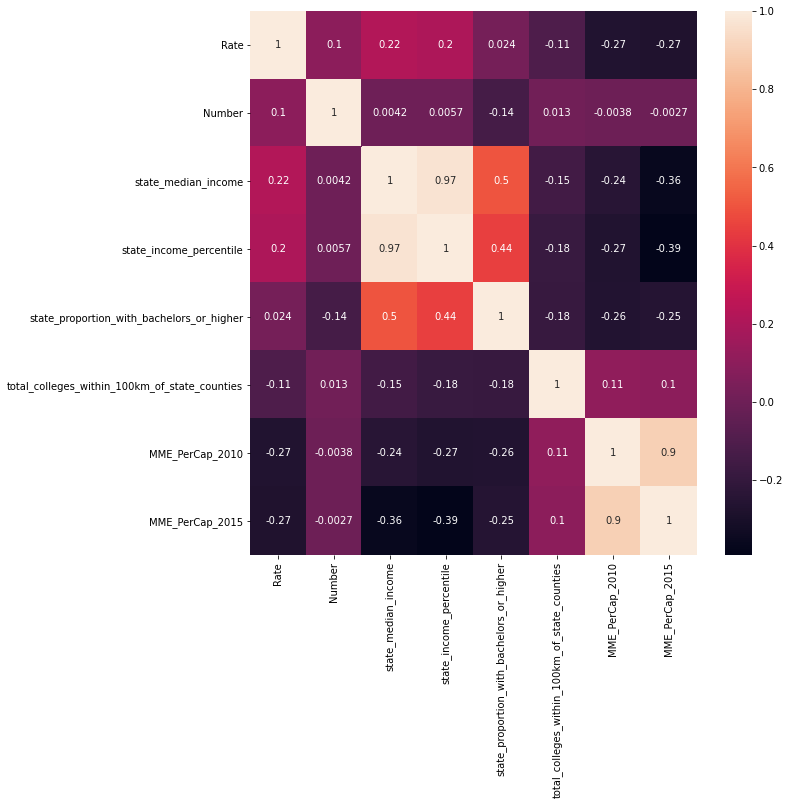

In [45]:
fig = plt.figure(figsize= (10,10))
sns.heatmap(df7.corr(), annot=True)
plt.show()

Text(0, 0.5, 'MME Per Cap')

<Figure size 720x720 with 0 Axes>

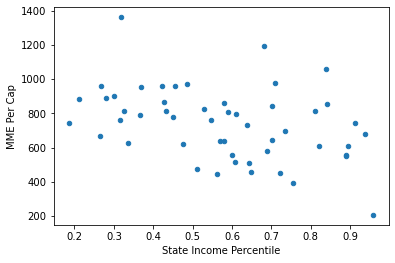

In [47]:
fig = plt.figure(figsize = (10, 10))

fig, ax = plt.subplots()
df7_scatter = df7.plot(kind='scatter', x='state_income_percentile', y='MME_PerCap_2015', ax=ax)

df7_scatter.set_xlabel("State Income Percentile")
df7_scatter.set_ylabel("MME Per Cap")


In [52]:
df7_region = df7.groupby(['region']).agg({'Rate':'mean',
                                      'Number':'sum',
                                      'state_median_income':'mean',
                                      'state_income_percentile':'mean',
                                      'state_proportion_with_bachelors_or_higher':'mean', 
                                      'total_colleges_within_100km_of_state_counties':'mean', 
                                      'MME_PerCap_2010':'sum', 
                                      'MME_PerCap_2015':'sum'})

df7_region

,Rate,Number,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_100km_of_state_counties,MME_PerCap_2010,MME_PerCap_2015
region,,,,,,,,
Midwest,17.658333,10914.0,52123.911660,0.588655,0.217417,2744.333333,8166.169176,7286.845800
Northeast,21.941667,9466.0,65449.356248,0.800553,0.302458,1709.083333,9521.041294,8310.781136
Southeast,16.516667,10986.0,43209.991386,0.328706,0.214775,3353.416667,11790.251795,10552.778816
Southwest,21.850000,7495.0,45782.018628,0.406510,0.213300,1297.250000,3382.317796,2968.945163
West,13.436364,13543.0,56559.580797,0.649973,0.246991,875.363636,10055.122202,8715.261673


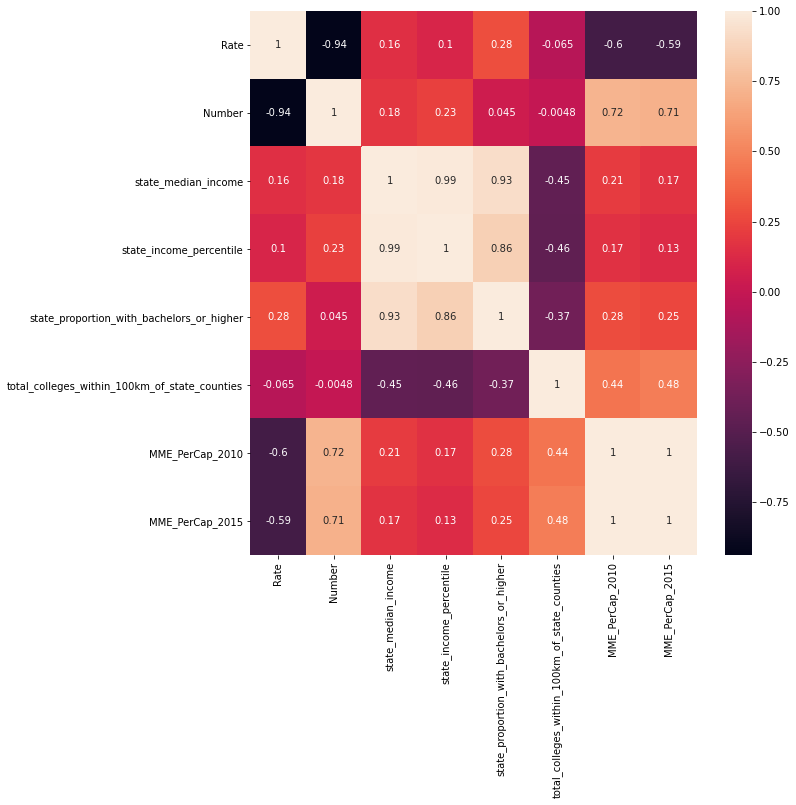

In [54]:
fig = plt.figure(figsize= (10,10))
sns.heatmap(df7_region.corr(), annot=True)
plt.show()

In [59]:
df7.head()

,key_0_x,key_0_y,Rate,Number,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_100km_of_state_counties,MME_PerCap_2010,MME_PerCap_2015
0,Alaska,AK,16.0,122.0,West,66425.448276,0.820631,0.1705,0,740.000000,609.770000
1,Alabama,AL,15.7,736.0,Southeast,40271.402985,0.266510,0.2642,1839,935.525758,958.045455
2,Arkansas,AR,13.8,392.0,Southeast,39025.080000,0.212615,0.1577,1955,917.344776,883.905970
3,Arizona,AZ,19.0,1274.0,Southwest,45816.666667,0.423407,0.2270,202,1064.942857,963.821429
4,California,CA,11.3,4659.0,West,61046.758621,0.700403,0.1849,4292,1063.996429,845.425000


Text(0, 0.5, 'MME Per Cap')

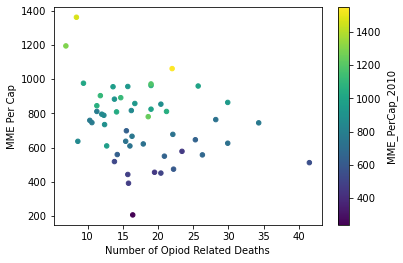

In [60]:
fig, ax = plt.subplots()
df7_scatter_region = df7.plot(kind='scatter', x='Rate', y='MME_PerCap_2015',c='MME_PerCap_2010', cmap='viridis', ax=ax)

df7_scatter_region.set_xlabel("Number of Opiod Related Deaths")
df7_scatter_region.set_ylabel("MME Per Cap")

Text(0, 0.5, 'MME Per Cap')

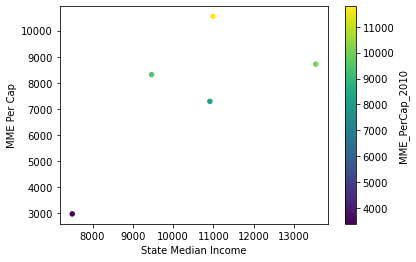

In [56]:
fig, ax = plt.subplots()
df7_scatter_region = df7_region.plot(kind='scatter', x='Number', y='MME_PerCap_2015',c='MME_PerCap_2010', cmap='viridis', ax=ax)

df7_scatter_region.set_xlabel("State Median Income")
df7_scatter_region.set_ylabel("MME Per Cap")

In [62]:
# new jersey prescriptions

fentynal = pd.read_csv('NJRxFentanyl11-16.csv')

In [93]:
fentynal = fentynal.replace(',','', regex=True)
c = fentynal.select_dtypes(object).columns
fentynal[c] = fentynal[c].apply(pd.to_numeric,errors='ignore')

In [94]:
fentynal.head()

,Month Dispensed,Abstral,Actiq,Duragesic,Fentanyl,Fentanyl Citrate,Fentora,Lazanda,Subsys,All Drug Total
0,Sep-01-2011,9,39,487,10461,392,330,0,0,11718
1,Oct-2011,4,38,470,10535,418,352,0,0,11817
2,Nov-2011,5,49,521,11012,425,405,1,0,12418
3,Dec-2011,4,40,571,11746,418,448,2,0,13229
4,Jan-2012,2,36,553,11603,407,329,0,0,12930


In [45]:
fentynal.tail()

,Abstral,Actiq,Duragesic,Fentanyl,Fentanyl Citrate,Fentora,Lazanda,Subsys,All Drug Total
Month Dispensed,,,,,,,,,
Oct-2016,1,11,281,"9,176",121,119,18,85,"9,812"
Nov-2016,4,14,281,"9,358",110,96,13,65,"9,941"
Dec-2016,4,10,268,"9,322",119,87,16,48,"9,874"
Jan-2017,5,11,241,"8,909",116,68,14,45,"9,409"
Feb-22-2017,3,5,145,"5,593",61,51,6,24,"5,888"


In [65]:
list(fentynal)

['Month Dispensed',
 'Abstral',
 'Actiq',
 'Duragesic',
 'Fentanyl',
 'Fentanyl Citrate',
 'Fentora',
 'Lazanda',
 'Subsys',
 'All Drug Total']

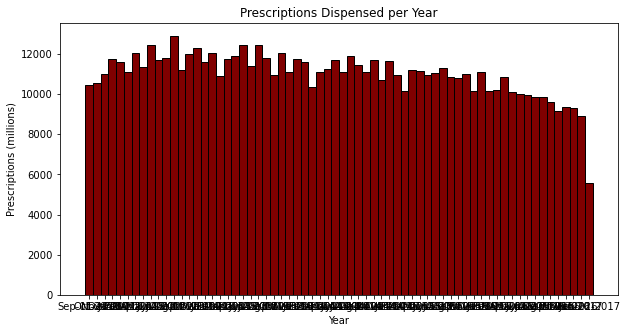

In [95]:
# change the data to a per year basis. combine the months 
# change strings to in


fig = plt.figure(figsize = (10, 5))
 
fent = fentynal['Fentanyl']
# creating the bar plot
plt.bar(fentynal['Month Dispensed'], fent, color ='maroon',
        width = 1, edgecolor = "black")
 
plt.xlabel("Year")
plt.ylabel("Prescriptions (millions)")
plt.title("Prescriptions Dispensed per Year")
plt.show()

In [96]:
# new jersey counties

fentynal2 = pd.read_csv('county-ods-16.csv')

In [97]:
fentynal2.head()

,COUNTY,2012 Total,2013 Total,2014 Total,2015 Total,1/1-6/30 2016 Total,2004 Heroin*,2005 Heroin*,2006 Heroin*,2007 Heroin*,...,2013 Heroin*,2014 Heroin,2015 Heroin,1/1-6/30 2016 Heroin,2012 Fentanyl,2013 Fentanyl,2014 Fentanyl,2015 Fentanyl,1/1-6/30 2016 Fentanyl,1/1-6/30 2016 Fentanyl Analogues**
0,Atlantic,81.0,84.0,88.0,85.0,83.0,24.0,24.0,19.0,18.0,...,47.0,48.0,54.0,48.0,3.0,1.0,9.0,23.0,29.0,1.0
1,Bergen,75.0,91.0,81.0,85.0,51.0,23.0,21.0,19.0,24.0,...,36.0,42.0,51.0,30.0,6.0,5.0,8.0,24.0,14.0,2.0
2,Burlington,67.0,70.0,75.0,87.0,46.0,6.0,13.0,17.0,8.0,...,43.0,25.0,41.0,19.0,4.0,0.0,13.0,38.0,7.0,0.0
3,Camden,139.0,160.0,138.0,191.0,76.0,37.0,38.0,71.0,29.0,...,104.0,91.0,115.0,54.0,1.0,1.0,12.0,53.0,23.0,1.0
4,Cape May,24.0,30.0,24.0,32.0,17.0,3.0,13.0,12.0,6.0,...,17.0,14.0,18.0,7.0,0.0,8.0,4.0,10.0,5.0,1.0


In [133]:
fentynal2 = fentynal2.dropna()

In [142]:
fentynal = fentynal2[['2012 Fentanyl',
 '2013 Fentanyl',
 '2014 Fentanyl',
 '2015 Fentanyl ',
 '1/1-6/30 2016 Fentanyl ']].astype(int)
fentynal

,2012 Fentanyl,2013 Fentanyl,2014 Fentanyl,2015 Fentanyl,1/1-6/30 2016 Fentanyl
0,3,1,9,23,29
1,6,5,8,24,14
2,4,0,13,38,7
3,1,1,12,53,23
4,0,8,4,10,5
5,0,0,1,10,9
6,2,4,13,29,35
7,0,0,3,17,13
8,2,4,6,18,13
9,0,0,0,2,1


In [146]:
# fent.apply(pd.to_numeric, errors='ignore')
fentynal_sum = fentynal.sum()
print(fentynal_sum)

2012 Fentanyl               84
2013 Fentanyl               92
2014 Fentanyl              284
2015 Fentanyl              834
1/1-6/30 2016 Fentanyl     674
dtype: int64
